In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_excel('/content/online_retail_II.xlsx', sheet_name =0)

In [5]:
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [7]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [8]:
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


Get Customer ID with NaN values

In [10]:
df[df['Customer ID'].isna()].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom


Filter the values in the 'quantity' column that are less than 0

In [11]:
df[df['Quantity']<0].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia


Convert the data type in the Invoice column to the correct type

In [12]:
df['Invoice'] = df['Invoice'].astype('str')

Invoice with 6 digits and nothing else

In [13]:
df[df['Invoice'].str.match("^\\d{6}$") == True]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [14]:
df['Invoice'].str.replace("[0-9]", "", regex = True).unique()

array(['', 'C', 'A'], dtype=object)

In [15]:
df[df['Invoice'].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [16]:
df['StockCode'] = df['StockCode'].astype('str')

In [17]:
df[(df['StockCode'].str.match("^\\d{5}$") == False)
   & (df['StockCode'].str.match("^\\d{5}[a-zA-Z]+$") == False)]['StockCode'].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [18]:
df[df['StockCode'].str.contains("^DOT")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


# Data Cleaning

In [19]:
cleaned_df = df.copy()

In [20]:
cleaned_df['Invoice'] = cleaned_df['Invoice'].astype(str)

In [21]:
mask = (
    cleaned_df['Invoice'].str.match("^\\d{6}$") == True
)
cleaned_df = cleaned_df[mask]
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [22]:
cleaned_df['StockCode'] = cleaned_df['StockCode'].astype('str')
mask = (
    (cleaned_df['StockCode'].str.match("^\\d{5}$") == True)
    | (cleaned_df['StockCode'].str.match("^\\d{5}[a-zA-Z]+$") == True)
    | (cleaned_df['StockCode'].str.match("^PADS$") == True)
)
cleaned_df = cleaned_df[mask]

In [23]:
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [24]:
cleaned_df.dropna(subset=["Customer ID"], inplace = True)

<ipython-input-24-5f425b5ed038>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset=["Customer ID"], inplace = True)


In [25]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.000000,406337,406337.000000,406337.000000
mean,13.619099,2010-07-01 10:11:06.543288320,2.991462,15373.632992
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,14004.000000
50%,5.000000,2010-07-09 15:48:00,1.950000,15326.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16814.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,97.000659,NaN,4.285876,1677.365907


In [26]:
cleaned_df = cleaned_df[cleaned_df['Price']>0]

# Feature Engineering

In [27]:
cleaned_df['SalesLineTotal'] = cleaned_df['Quantity'] * cleaned_df['Price']

<ipython-input-27-1ebd9184a872>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['SalesLineTotal'] = cleaned_df['Quantity'] * cleaned_df['Price']


In [28]:
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50


In [29]:
aggregated_df = cleaned_df.groupby(by = 'Customer ID', as_index = False) \
  .agg(
      MonetaryValue = ('SalesLineTotal', 'sum'),
      Frequency = ('Invoice', 'nunique'),
      LastInvoiceDate = ('InvoiceDate', 'max')
  )

In [30]:
aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.0,169.36,2,2010-06-28 13:53:00
1,12347.0,1323.32,2,2010-12-07 14:57:00
2,12348.0,221.16,1,2010-09-27 14:59:00
3,12349.0,2221.14,2,2010-10-28 08:23:00
4,12351.0,300.93,1,2010-11-29 15:23:00


In [31]:
max_invoice_date = aggregated_df['LastInvoiceDate'].max()

In [32]:
aggregated_df['Recency'] = (max_invoice_date - aggregated_df['LastInvoiceDate']).dt.days

In [33]:
aggregated_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.0,169.36,2,2010-06-28 13:53:00,164
1,12347.0,1323.32,2,2010-12-07 14:57:00,2
2,12348.0,221.16,1,2010-09-27 14:59:00,73
3,12349.0,2221.14,2,2010-10-28 08:23:00,42
4,12351.0,300.93,1,2010-11-29 15:23:00,10


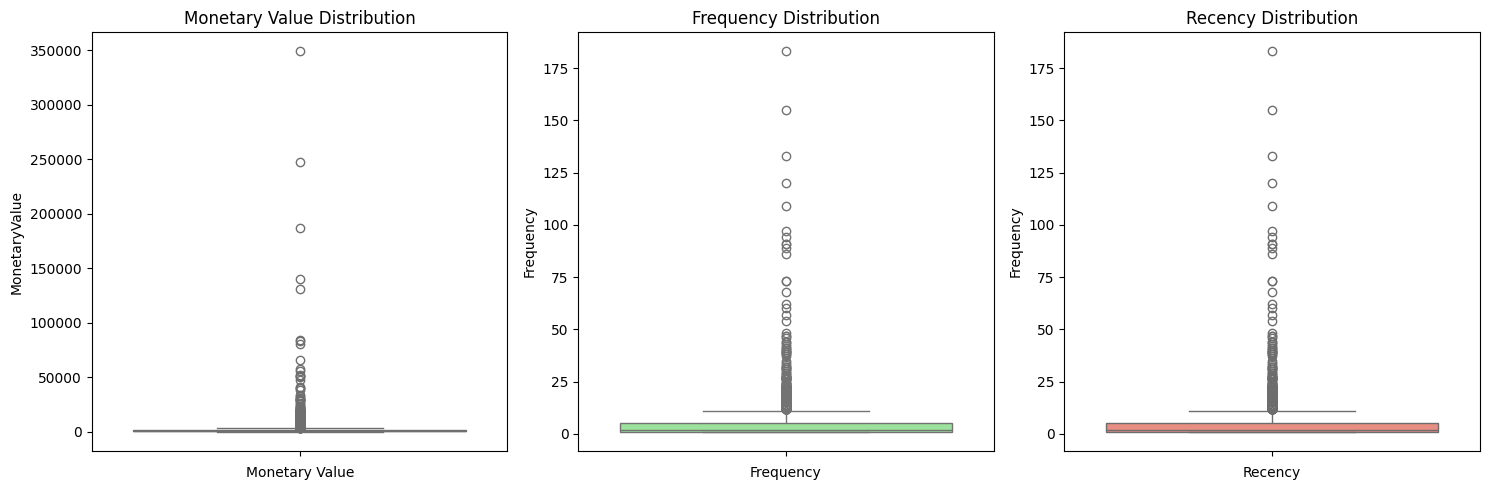

In [34]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
sns.boxplot(data = aggregated_df['MonetaryValue'], color = 'skyblue')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data = aggregated_df['Frequency'], color = 'lightgreen')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data = aggregated_df['Frequency'], color = 'salmon')
plt.title('Recency Distribution')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

Monetary Outliers

In [35]:
M_Q1 = aggregated_df['MonetaryValue'].quantile(0.25)
M_Q1

307.56

In [36]:
M_Q3 = aggregated_df['MonetaryValue'].quantile(0.75)
M_Q3

1704.29

In [37]:
M_IQR = M_Q3 - M_Q1

In [38]:
monetary_outliers_df = aggregated_df[(aggregated_df['MonetaryValue'] >(M_Q3 + 1.5 * M_IQR))
| (aggregated_df['MonetaryValue'] < (M_Q1 - 1.5 *M_IQR))].copy()

In [39]:
monetary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,423.000000,423.000000,423.000000,423,423.000000
mean,15103.040189,12188.101740,17.167849,2010-11-09 12:26:02.978723328,30.035461
min,12357.000000,3802.040000,1.000000,2009-12-10 18:03:00,0.000000
25%,13622.000000,4605.940000,8.000000,2010-11-08 13:17:30,3.000000
50%,14961.000000,6191.320000,12.000000,2010-11-26 12:19:00,13.000000
75%,16692.000000,10273.235000,18.000000,2010-12-06 10:34:30,31.000000
max,18260.000000,349164.350000,183.000000,2010-12-09 19:32:00,364.000000
std,1728.661406,25830.851045,19.729755,NaN,51.541004


Frequency Outliers

In [40]:
F_Q1 = aggregated_df['Frequency'].quantile(0.25)
F_Q3 = aggregated_df['Frequency'].quantile(0.75)
F_IQR = F_Q3 - F_Q1

frequency_outliers_df = aggregated_df[(aggregated_df['Frequency'] > (F_Q3 + 1.5 * F_IQR)) |
                    (aggregated_df['Frequency'] < (F_Q1 - 1.5 * F_IQR))].copy()

frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,279.000000,279.000000,279.000000,279,279.000000
mean,15352.655914,14409.714932,23.810036,2010-11-23 11:06:20.645161216,16.089606
min,12437.000000,1094.390000,12.000000,2010-05-12 16:51:00,0.000000
25%,13800.000000,4331.560500,13.000000,2010-11-20 13:14:30,2.000000
50%,15465.000000,6615.770000,17.000000,2010-12-02 10:46:00,7.000000
75%,16828.500000,11692.405000,23.000000,2010-12-07 11:08:30,19.000000
max,18260.000000,349164.350000,183.000000,2010-12-09 19:32:00,211.000000
std,1748.429987,31381.736785,21.932937,NaN,26.589117


Non outliers

In [41]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index))
                                & (~aggregated_df.index.isin(frequency_outliers_df.index))]

In [42]:
non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3809.000000,3809.000000,3809.000000,3809,3809.000000
mean,15376.482804,885.502197,2.863481,2010-09-03 11:16:46.516146176,97.082174
min,12346.000000,1.550000,1.000000,2009-12-01 10:49:00,0.000000
25%,13912.000000,279.910000,1.000000,2010-07-08 14:48:00,22.000000
50%,15389.000000,588.050000,2.000000,2010-10-12 16:25:00,58.000000
75%,16854.000000,1269.050000,4.000000,2010-11-17 13:14:00,154.000000
max,18287.000000,3788.210000,11.000000,2010-12-09 20:01:00,373.000000
std,1693.199806,817.672283,2.243748,NaN,98.111495


In [43]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(non_outliers_df[['MonetaryValue', 'Frequency', 'Recency']])

In [44]:
scaled_data

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.5355144 , -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488781,  0.50659348, -0.81634357]])

In [45]:
scaled_data_df = pd.DataFrame(scaled_data, index = non_outliers_df.index, columns = ('MonetaryValue', 'Frequency', 'Recency'))

In [46]:
scaled_data_df

,MonetaryValue,Frequency,Recency
0,-0.875945,-0.384889,0.682149
1,0.535514,-0.384889,-0.969251
2,-0.812586,-0.830631,-0.245489
3,1.633678,-0.384889,-0.561498
4,-0.715016,-0.830631,-0.887700
...,...,...,...
4280,-0.298120,1.398076,-0.816344
4281,-0.579553,-0.830631,-0.316846
4282,-0.621972,-0.830631,2.017539
4283,0.441467,-0.384889,0.141876


KMeans Clustering

Text(0, 0.5, 'Silhouette score')

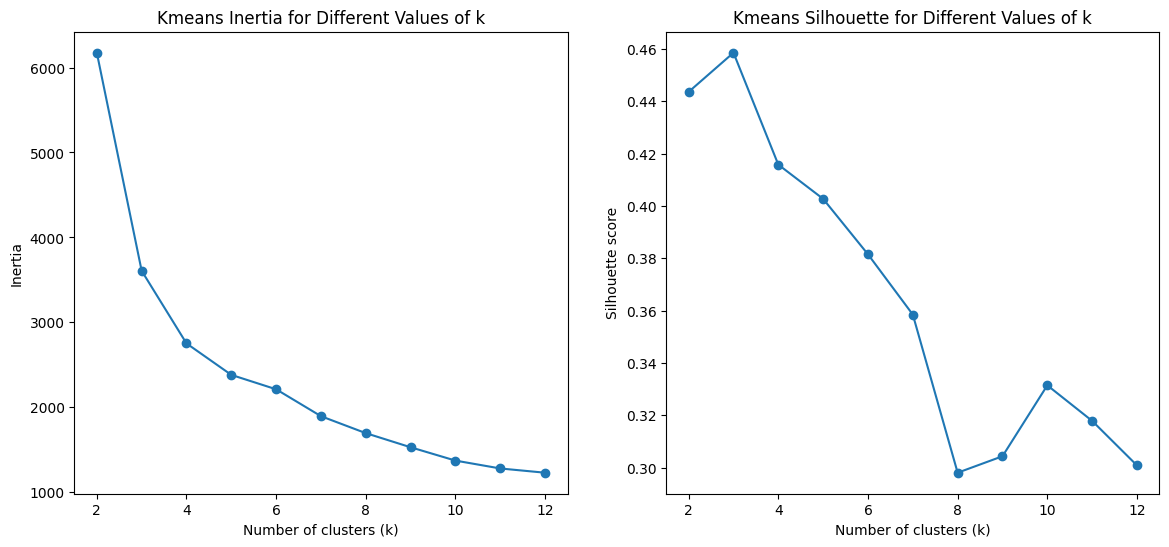

In [47]:
max_k = 12
inertia = []
k_values = range(2, max_k +1)
silhouette_scores = []

for k in k_values:
  kmeans = KMeans(n_clusters=k, random_state = 42, max_iter=1000)
  cluster_labels = kmeans.fit_predict(scaled_data_df)
  sil_score  = silhouette_score(scaled_data_df, cluster_labels)
  silhouette_scores.append(sil_score)
  inertia.append(kmeans.inertia_)
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.plot(k_values, inertia, marker = 'o')
plt.title('Kmeans Inertia for Different Values of k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')

plt.subplot(1,2,2)
plt.plot(k_values, silhouette_scores, marker = 'o')
plt.title('Kmeans Silhouette for Different Values of k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')

In [48]:
kmeans = KMeans(n_clusters=4, random_state = 42, max_iter = 1000)

In [49]:
cluster_labels = kmeans.fit_predict(scaled_data_df)

In [50]:
cluster_labels

array([1, 0, 2, ..., 1, 0, 0], dtype=int32)

In [51]:
non_outliers_df['Cluster'] = cluster_labels

<ipython-input-51-dda75016c46c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df['Cluster'] = cluster_labels


In [52]:
non_outliers_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.0,169.36,2,2010-06-28 13:53:00,164,1
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.0,221.16,1,2010-09-27 14:59:00,73,2
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.0,300.93,1,2010-11-29 15:23:00,10,2


In [53]:
cluster_colors = {
    0: '#1f77b4',
    1: '#ff7f0e',
    2: '#2ca02c',
    3: '#d62728'
}

In [54]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Monetary Value by Cluster')

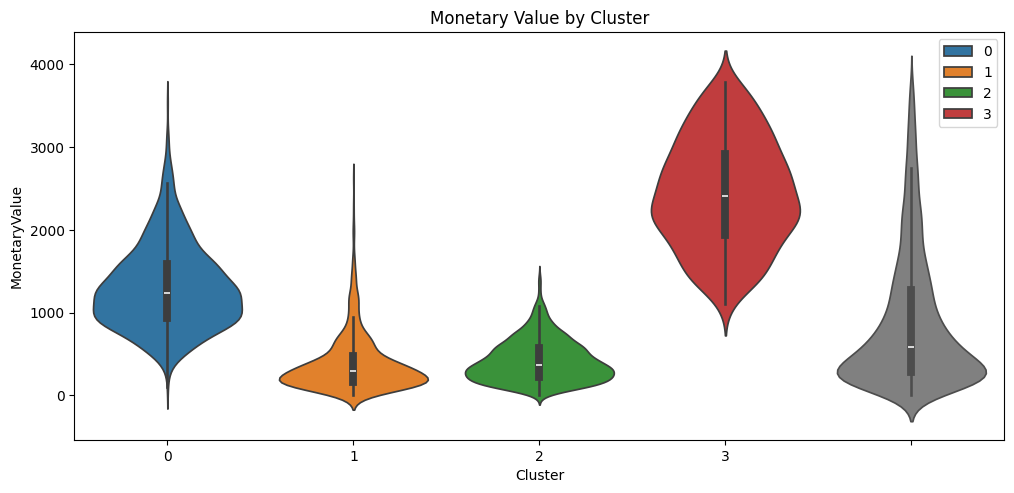

In [58]:
plt.figure(figsize=(12,18))
plt.subplot(3,1,1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['MonetaryValue'], data=df, hue=non_outliers_df['Cluster'], palette=cluster_colors)
sns.violinplot(y=non_outliers_df['MonetaryValue'], color = 'gray')
plt.title('Monetary Value by Cluster')

Text(0.5, 1.0, 'Frequency Value by Cluster')

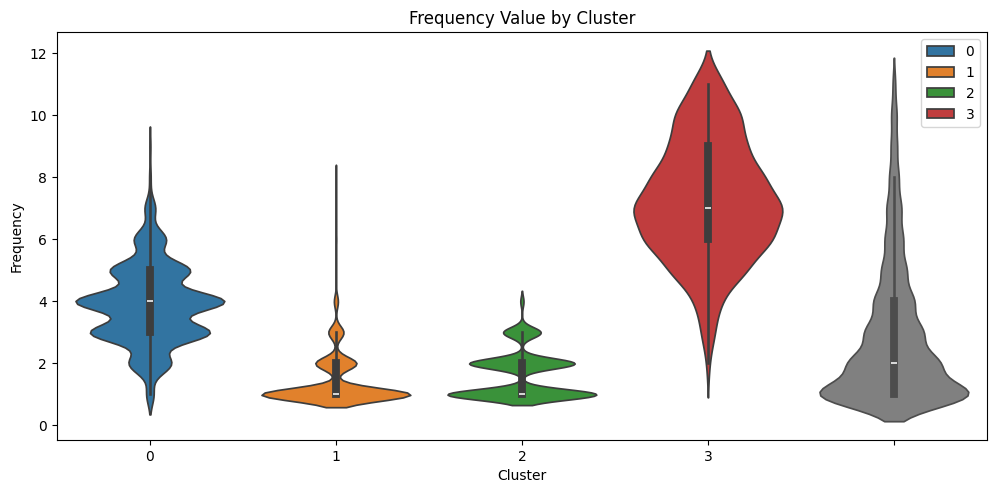

In [61]:
plt.figure(figsize=(12,18))
plt.subplot(3,1,1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Frequency'], data=df, hue=non_outliers_df['Cluster'], palette=cluster_colors)
sns.violinplot(y=non_outliers_df['Frequency'], color = 'gray')
plt.title('Frequency Value by Cluster')

Text(0.5, 1.0, 'Recency Value by Cluster')

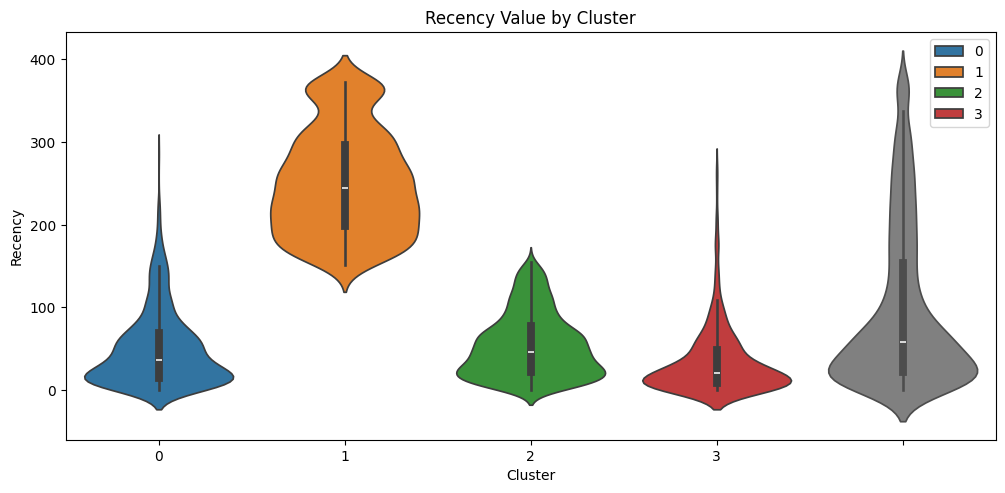

In [63]:
plt.figure(figsize=(12,18))
plt.subplot(3,1,1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Recency'], data=df, hue=non_outliers_df['Cluster'], palette=cluster_colors)
sns.violinplot(y=non_outliers_df['Recency'], color = 'gray')
plt.title('Recency Value by Cluster')

**Rationale**
- **Cluster 0 (blue):**
Represents customers who purchase regularly but not recently (high-value customers).

- **Cluster 1 (orange):**
This group includes customers who do not buy frequently and have low purchase power but do buy recently.

- **Cluster 2 (green):**
These customers are of the lowest value, but they have made recent purchases.

- **Cluster 3 (red):**
This cluster includes customers spending a lot of money compared to the average. They are also frequent buyers.

**Summary:**

- **Cluster 0 (blue):**
Loyal but Inactive.

- **Cluster 1 (orange):**
Recent but Infrequent.

- **Cluster 2 (green):**
Low-Value, Recently Active.


- **Cluster 3 (red):**
High-Spending, Frequent.






**Strategy:**

- **Cluster 0 (Blue):** Re-engage with personalized offers and loyalty rewards.

- **Cluster 1 (Orange):** Use upselling and targeted discounts to increase spending.

- **Cluster 2 (Green):** Drive frequency with time-limited offers and upsells.

- **Cluster 3 (Red):** Offer VIP rewards and referral incentives to retain loyalty.




In [64]:
monetary_outliers_df
frequency_outliers_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
65,12437.0,6834.99,20,2010-11-09 14:46:00,30
84,12471.0,17721.45,44,2010-11-30 14:35:00,9
85,12472.0,10426.48,13,2010-12-05 14:19:00,4
92,12482.0,21941.72,27,2010-05-12 16:51:00,211
115,12523.0,2330.38,12,2010-11-30 12:31:00,9
...,...,...,...,...,...
4236,18225.0,7545.14,15,2010-12-09 15:46:00,0
4237,18226.0,6650.83,15,2010-11-26 15:51:00,13
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41
4250,18245.0,3757.92,13,2010-11-25 16:52:00,14


In [65]:
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)

In [66]:
overlap_indices

Index([  65,   84,   85,   92,  126,  145,  164,  179,  202,  203,
       ...
       4107, 4125, 4143, 4156, 4200, 4235, 4236, 4237, 4241, 4262],
      dtype='int64', length=226)

In [70]:
monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)
money_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]

In [71]:
monetary_only_outliers['Cluster'] = -1
frequency_only_outliers['Cluster']= -2
money_and_frequency_outliers['Cluster'] = -3

In [72]:
outlier_cluster_df = pd.concat([monetary_only_outliers, frequency_only_outliers, money_and_frequency_outliers ])

In [73]:
outlier_cluster_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
9,12357.0,11229.99,1,2010-11-16 10:05:00,23,-1
25,12380.0,4782.84,4,2010-08-31 14:54:00,100,-1
42,12409.0,12346.62,4,2010-10-15 10:24:00,55,-1
48,12415.0,19468.84,4,2010-11-29 15:07:00,10,-1
61,12431.0,4145.52,11,2010-12-01 10:03:00,8,-1
...,...,...,...,...,...,...
4235,18223.0,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.0,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.0,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41,-3


In [77]:
cluster_colors = {
    -1: '#9467bd',
    -2: '#8c564b',
    -3: '#e377c2'
}

Text(0.5, 1.0, 'Monetary Value by Cluster')

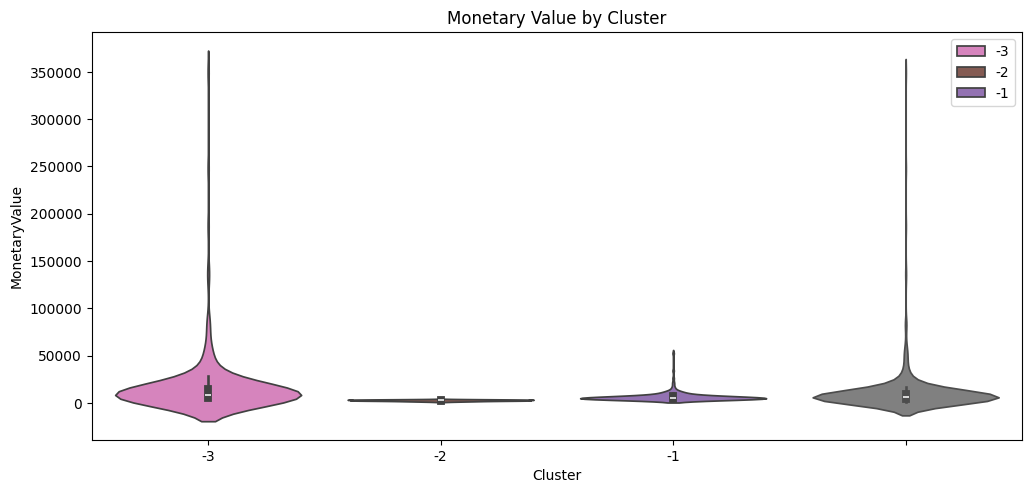

In [78]:
plt.figure(figsize=(12,18))
plt.subplot(3,1,1)
sns.violinplot(x=outlier_cluster_df['Cluster'], y=outlier_cluster_df['MonetaryValue'], data=df, hue=outlier_cluster_df['Cluster'], palette=cluster_colors)
sns.violinplot(y=outlier_cluster_df['MonetaryValue'], color = 'gray')
plt.title('Monetary Value by Cluster')

Text(0.5, 1.0, 'Frequency Value by Cluster')

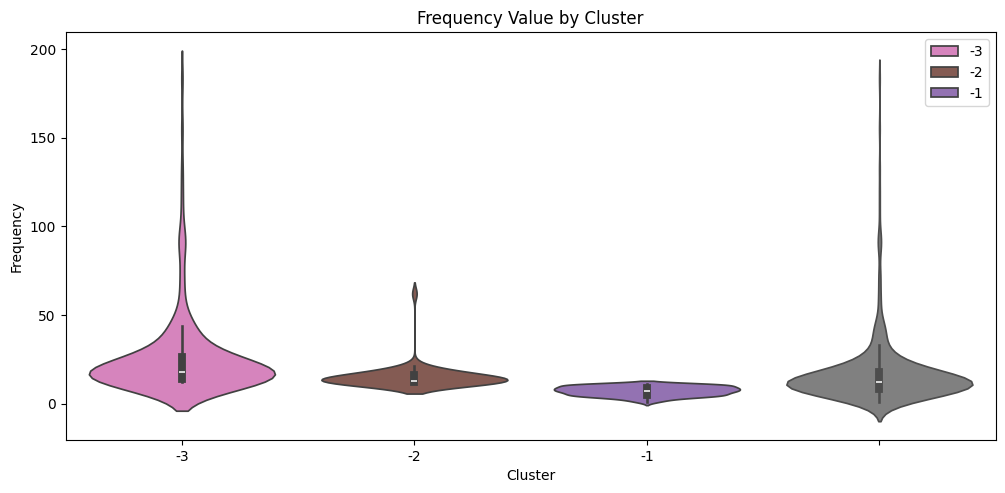

In [79]:
plt.figure(figsize=(12,18))
plt.subplot(3,1,1)
sns.violinplot(x=outlier_cluster_df['Cluster'], y=outlier_cluster_df['Frequency'], data=df, hue=outlier_cluster_df['Cluster'], palette=cluster_colors)
sns.violinplot(y=outlier_cluster_df['Frequency'], color = 'gray')
plt.title('Frequency Value by Cluster')

Text(0.5, 1.0, 'Recency Value by Cluster')

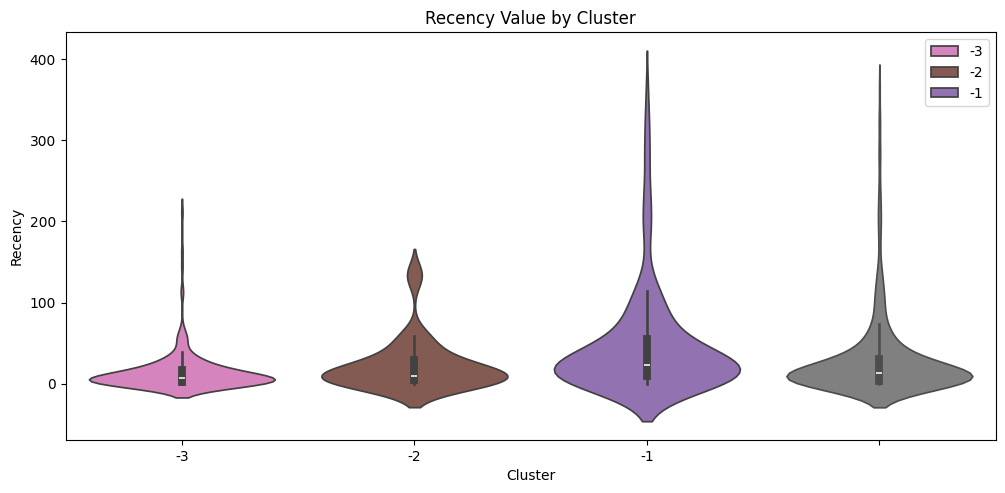

In [80]:
plt.figure(figsize=(12,18))
plt.subplot(3,1,1)
sns.violinplot(x=outlier_cluster_df['Cluster'], y=outlier_cluster_df['Recency'], data=df, hue=outlier_cluster_df['Cluster'], palette=cluster_colors)
sns.violinplot(y=outlier_cluster_df['Recency'], color = 'gray')
plt.title('Recency Value by Cluster')

**Summary:**

**Cluster -1 (Big Spenders):**
- Characteristics: High spenders, infrequent buyers.
- Strategy: Offer personalized offers and luxury services to maintain loyalty.

**Cluster -2 (Frequent Buyers):**
- Characteristics: Frequent buyers, low spend per purchase.
- Strategy: Use loyalty programs and bundle deals to encourage higher spending.

**Cluster -3 (Top Customers):**
- Characteristics: High spenders, frequent buyers.
- Strategy: Provide VIP programs and exclusive offers to retain top customers.




In [88]:
cluster_labels = {
     0: "Loyal but Inactive",
    1: "Recent but Infrequent",
    2: "Low-Value, Recently Active",
    3: "High-Spending, Frequent",
    -1: "Big Spenders",
    -2: "Frequent Buyers",
    -3: "Top Customers"

}

In [83]:
full_clustering_df = pd.concat([non_outliers_df, outlier_cluster_df])

In [84]:
full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.0,169.36,2,2010-06-28 13:53:00,164,1
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.0,221.16,1,2010-09-27 14:59:00,73,2
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.0,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4235,18223.0,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.0,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.0,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41,-3


In [86]:
full_clustering_df['ClusterLabel'] = full_clustering_df['Cluster'].map(cluster_labels)

In [87]:
full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
0,12346.0,169.36,2,2010-06-28 13:53:00,164,1,Recent but Infrequent
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,0,Loyal but Inactive
2,12348.0,221.16,1,2010-09-27 14:59:00,73,2,"Low-Value, Recently Active"
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,0,Loyal but Inactive
4,12351.0,300.93,1,2010-11-29 15:23:00,10,2,"Low-Value, Recently Active"
...,...,...,...,...,...,...,...
4235,18223.0,7516.31,12,2010-11-17 12:20:00,22,-3,Top Customers
4236,18225.0,7545.14,15,2010-12-09 15:46:00,0,-3,Top Customers
4237,18226.0,6650.83,15,2010-11-26 15:51:00,13,-3,Top Customers
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41,-3,Top Customers


# Visualization

Text(0, 0.5, 'Average Value')

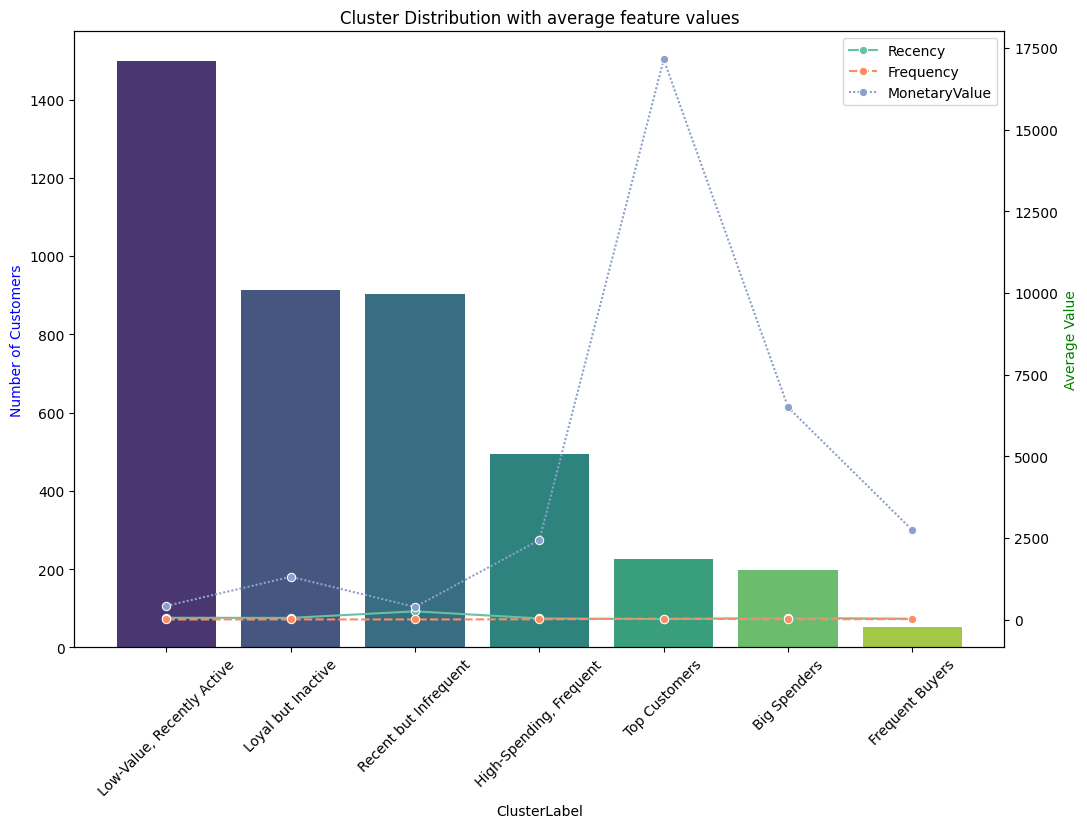

In [92]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue']].mean()

fig, ax1 = plt.subplots(figsize=(12,8))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax = ax1, palette='viridis', hue = cluster_counts.index )
ax1.set_ylabel('Number of Customers', color ='b')
ax1.set_title('Cluster Distribution with average feature values')
plt.xticks(rotation=45)
ax2 = ax1.twinx()
sns.lineplot(data = feature_means, ax=ax2, palette = 'Set2', marker ='o')
ax2.set_ylabel('Average Value', color = 'g')
